<a href="https://colab.research.google.com/github/MaiteVillalon/ADA-informes/blob/main/M%C3%A1ximo_Sub_Arreglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problema del subarreglo máximo**

###**Descripción del problema**

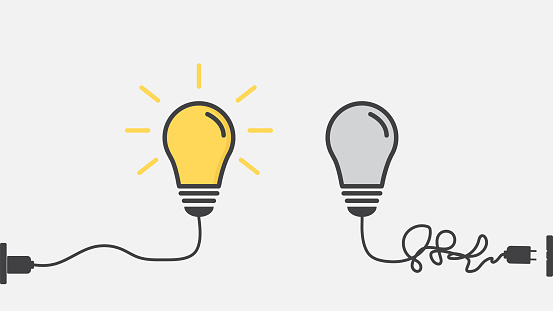

Anteriormente nos dedicamos a analizar dos algoritmos de ordenamiento, InsertionSort y MergeSort. Ahora nos enfocaremos en los algortimos que nos ayudan a la **optimización**, en este informe nos enfocaremos en uno solo, ***Problema del subarreglo máximo.***




```
 Entrada: Arreglo de números [a1, a2 . . ., an], de tamaño n.

 Salida: Sub-arreglo [ai, . . ., aj], tal que la suma de los elementos es mayor  o igual a cualquier otro
         sub-arreglo que podamos encontrar dentro del arreglo de entrada.
```











##**Descripción del algoritmo**

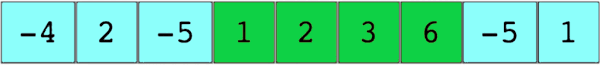

Como mencionamos en la sección anterior, le entregaremos por entrada al algoritmo un arreglo (arr) de n números, indices l y h, y este nos dará por salida el subarreglo máximo de el arreglo arr, es decir, en ese subarreglo contiguo encontremos **los números que generan la mayor suma.**

Este algoritmo utiliza el principio "***divide y venceras***", buscando recursivamente el subarreglo maximo en cada mitad del arreglo de entrada.

Para encontrar el subarreglo máximo el algoritmo sigue los siguientes pasos:



1.    **Dividimos** el arreglo en 2 y buscamos, **recursivamente**, el **máximo sub-arreglo** de cada mitad.
2.   Buscamos el máximo sub-arreglo que contenga el punto de división. Esto no es una recursión ya que es un problema diferente: el sub-arreglo contiene al punto de división.

1.   Retornamos el máximo de los tres sub-arreglos.

***¿Cómo funciona el paso N° 2?***

Para encontrar el subarreglo que genera la mayor suma y que contiene el elemento medio debemos seguir los siguientes pasos.



*   Revisaremos en la mitad izquierda del arreglo, partimos desde el elemento medio (arr[i]) y vamos moviendonos en dirección izquierda ( i = i - 1), con el fin de buscar el comienzo del máximo subarreglo(i). Realizamos el mismo procedimiento con la mitad derecha, comenzamos desde el elemento medio y nos movemos en direccion derecha, esta vez buscando el final del máximo subarreglo(j), de esta forma obtendremos el máximo subarreglo que contiene el elemento medio arr[i, ... j].



***Ejemplo paso a paso del algoritmo***

Tenemos el siguiente arreglo de entrada: **arr[-2, -3, 4, -1, 5, 1, 5, -3]**

Primero se divide el arreglo de entrada en dos subarreglos (izquierdo y derecho), obteniendo de esta forma:

izq: [-2, -3, 4, -1]

der: [5, 1, 5, -3]

Debido a las llamadas recursivas seguiremos dividiendo el subarreglo izquierdo hasta que quede con un elemento cada sub arreglo.

iz: [-2, -3]

der: [4, 1]

***Se subdivide [-2,-3]***

izq:  [-2]

der: [-3]


Dado que el subarreglo se fue subdividiendo hasta quedar 2 subarreglo con solo 1 elemento cada uno, ahora la funcion MaxCrossSubArray encontrará la el máximo subarreglo que contenga el elemento medio entre los dos.

**Máximo Subarreglo que pasa por el medio:**  [-2, -3] ([-2] y [-3])

A continuacíon el algoritmo irá revisando los subarreglo que aun no esten completamente divididos hasta que queden de solo un elemento e irá buscando el  máximo subarreglo que contenga el elemento medio entre los dos.

***Se subdivide [4,-1]***

SubArreglo Izquierdo:**[4]

SubArreglo Derecho: [-1]

**Máximo Subarreglo que pasa por el medio:  [4, -1]** ( [4] y [-1])


**Máximo Subarreglo que pasa por el medio:  [-3, 4] ** ( [-2,3] y [4,-1] )

SubArreglo Izquierdo:  [5, 1]

SubArreglo Derecho:  [5, -3] 

***Se subdivide [5,1]***

SubArreglo Izquierdo:  [5]

SubArreglo Derecho:  [1]

**Máximo Subarreglo que pasa por el medio: ** [5, 1] ( [5] y [1] )

***Se subdivide [5,3]***

SubArreglo Izquierdo:  [5]

SubArreglo Derecho:  [-3]

**Máximo Subarreglo que pasa por el medio:  [5, -3]** ( [5] y [-3])

**Máximo Subarreglo que pasa por el medio:  [5, 1, 5]**  ( [5 , 1] y  [5 , -3] )

**Máximo Subarreglo que pasa por el medio:  [4, -1, 5, 1, 5]** ([4, -1] y [5, 1, 5] )




##**Implementación del algoritmo**

In [42]:
from termcolor import colored
 
# Función obtiene el máximo subarreglo que contiene el elemento del medio
def maxCrossSubArray(arr,contador, mitad,l ,h, verbose):
  
  sum = 0
  max_sum_izq = -100000000 # Inicializa la suma del subarreglo izquierdo en un numero negativo muy grande
  end_izq = 0  # Comienzo del arreglo
 
  # Se obtiene subarreglo mas grande de la izquierda.
  for i in range(mitad-1, l - 1, -1): #* deberia ser en range(m, l - 1, -1) por que ahora arr es siempre el mismo arreglo
    sum = sum + arr[i]
    contador[1] = contador[1] +1
    
    if (sum > max_sum_izq):
       max_sum_izq = sum
       end_izq = i #Si la suma actual es mayor a la máxima que estaba guardada, se actualiza la variable y guardo la posicion i como el comienzo del posible "maxcrossSubarray"
 
 
 
  sum = 0
  max_sum_der = -1000000 # Inicializa la suma del subarreglo izquierdo en un numero negativo muy grande
  end_der = len(a) # Termino subarreglo.
  
  # Se obtiene el subarreglo maximo de la derecha.
  for i in range (mitad, h): #* deberia ser range(m, r + 1) ya que arr siempre tendra la misma len(arr) c
    sum = sum + arr[i]
    contador[1] = contador[1] +1
    
    if (sum > max_sum_der):
      max_sum_der = sum
      end_der = i+1  #Si la suma actual es mayor a la máxima que estaba guardada, se actualiza la variable y guardo la posicion i como el final del posible "maxcrossSubarray"
 

  max_cross_sum = max_sum_izq + max_sum_der #La suma de las maximas sumas de los subarreglos izq y der hacen la maxima suma del arreglo que pasa por el medio
  #* intenta restandole a esta sum el arr[m] para el caso excepcional que plantee en la ayudantia
 
  # Si verbose es True, se muestran el subarreglo mayor que cruza por el medio.
  if (verbose == True):
    
    if (len (arr[end_izq:end_der]) > 1):
      print ("Maximo Subarreglo que pasa por el medio: ",arr[end_izq: end_der])
    else:
      print ("Máximo subarreglo que pasa por el medio: ",(arr[end_izq: end_der]))
 
 
 
  maxSum = max (max_sum_izq, max_sum_der, max_cross_sum)
 

 
  return max_cross_sum, end_izq, end_der
 
#Parte del algortimo "divide y venceras"
def maxSubArray(arr, contador, l = 0, h = -1, verbose = False):
  if l == 0 and h == -1:
    l = 0
    h = len(arr)
 
  # Caso base.
  if (h-l == 1):
    return (arr[h-1], l, h)
 
  if ( l > h):
    return -float ("inf")
 
  mitad = (l + h) //2
 
  # Subarreglos
  izq = arr[l:mitad]
  der = arr[mitad : h ]
 
  
  if (verbose == True):
        print("SubArreglo Izquierdo: ", izq)
        print("SubArreglo Derecho: ", der, "\n")
 
# Llamadas recursivas
  contador[0] = contador[0] +1
  maxLeft, lowLeft, highLeft = maxSubArray(arr,contador, l, mitad , verbose)
  maxRight, lowRight, highRight = maxSubArray(arr,contador, mitad, h, verbose)
  maxMid, lowMid, highMid = maxCrossSubArray(arr,contador, mitad,l,h,verbose)
 
  # Se obtiene la máxima suma.
  maxSum = max (maxLeft, maxRight, maxMid)
 
  if (maxSum == maxMid): 
    return maxSum, lowMid, highMid
 
  elif (maxSum == maxRight):
    return maxSum, lowRight, highRight
 
  elif (maxSum == maxLeft):
    return maxSum, lowLeft, highLeft
 
a = [-2, -3, 4, -1, 5, 1, 5, -3]
contador = [0,0] 
#posición 0: llamadas recursivas
#posicion 1: comparaciones
print("Arreglo de entrada: ", a, "\n")
b, i, j = maxSubArray(a,contador, verbose = False)
print ("\nLa suma máxima dentro del arreglo es: ", b)
print ("El arreglo comienza en la posición: ", i
       , " y termina en la posición ", j-1)
print("\ncantidad de llamadas operaciones:", contador[0])


Arreglo de entrada:  [-2, -3, 4, -1, 5, 1, 5, -3] 


La suma máxima dentro del arreglo es:  14
El arreglo comienza en la posición:  2  y termina en la posición  6

cantidad de llamadas operaciones: 7


##**Implementacion Opción (verbose = True)**

In [6]:
a = [-2, -3, 4, -1, 5, 1, 5, -3]
print("Arreglo de entrada: ", a, "\n")
b, i, j = maxSubArray(a, verbose = True)
print ("\nLa suma máxima dentro del arreglo es: ", b)
print ("El arreglo comienza en la posición: ", i
       , " y termina en la posición ", j-1)


Arreglo de entrada:  [-2, -3, 4, -1, 5, 1, 5, -3] 

SubArreglo Izquierdo:  [-2, -3, 4, -1]
SubArreglo Derecho:  [5, 1, 5, -3] 

SubArreglo Izquierdo:  [-2, -3]
SubArreglo Derecho:  [4, -1] 

SubArreglo Izquierdo:  [-2]
SubArreglo Derecho:  [-3] 

Maximo Subarreglo que pasa por el medio:  [-2, -3]
SubArreglo Izquierdo:  [4]
SubArreglo Derecho:  [-1] 

Maximo Subarreglo que pasa por el medio:  [4, -1]
Maximo Subarreglo que pasa por el medio:  [-3, 4]
SubArreglo Izquierdo:  [5, 1]
SubArreglo Derecho:  [5, -3] 

SubArreglo Izquierdo:  [5]
SubArreglo Derecho:  [1] 

Maximo Subarreglo que pasa por el medio:  [5, 1]
SubArreglo Izquierdo:  [5]
SubArreglo Derecho:  [-3] 

Maximo Subarreglo que pasa por el medio:  [5, -3]
Maximo Subarreglo que pasa por el medio:  [5, 1, 5]
Maximo Subarreglo que pasa por el medio:  [4, -1, 5, 1, 5]

La suma máxima dentro del arreglo es:  14
El arreglo comienza en la posición:  2  y termina en la posición  6


##**Propiedades del algoritmo**

###***Tiempo de ejecución***

A continuación analizaremos sel tiempo de ejecución para el algoritmo del sub_arreglo máximo.

Primero, en la funcion MaxSubArray, tenemos el caso base donde la ultima posición es igual a la primera, en otras palabras, el arreglo contiene solo un elemento, este caso tomara un tiempo de ejecución de:



> **T(1) = O(1)**

Posterior al caso base, tenemos las llamadas recursivas para encontrar el máximo subarreglo izquierdo y derecho, tenemos que el arreglo se divide en 2 subarreglos de tamaño (n/2):


> **T(n) = 2T(n/2)**


Y finalmente la llamada a MaxCrossSubarr tiene un timpo de O(n).Si sumamos todos estos tiempos de ejecucion obtenemos:



> **T(n) = O(1) + 2T(n/2) + O(n)**

Considerando los dos casos armaremos nuestra función de recurrencia:


```
T(n) =  O(1)                 si   n=1
        2T(n/2) + O(n)       si   n>1

```

***Teorema (Tiempo de ejecución)***

El algoritmo del subarreglo máximo tiene un tiempo de ejecución de **O(n log n)** en todos sus casos.

Para probar nuestro teorema usaremos el arbol de recursión para la función de recurrencia planteada anteriormente, **T(n) = 2T(n/2) + 0(n)**


**Árbol de recursión**

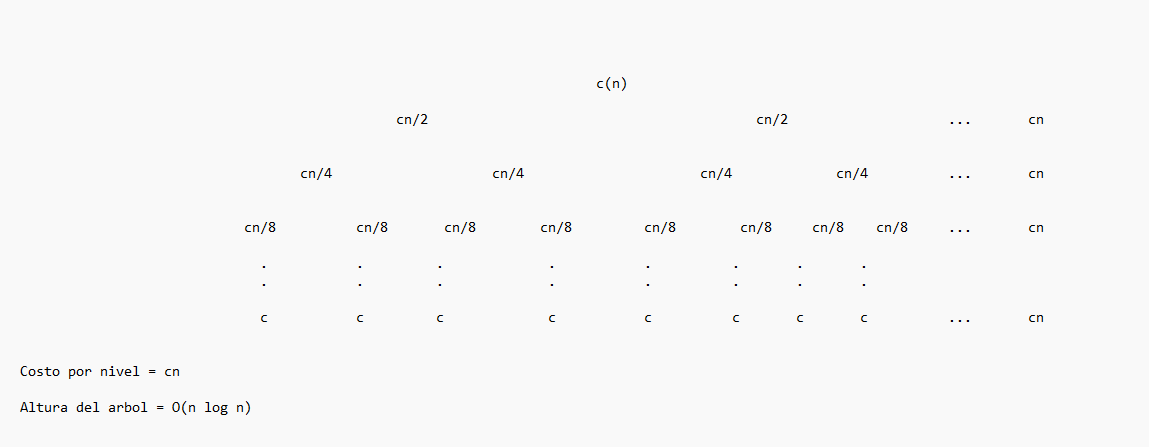


Podemos que al sumar cada nivel nos da un costo de cn y luego el costo total nos da O(n log n).

**Metodo de sustitución**

Ahora, probaremos por el metodo de sustitución matemática:
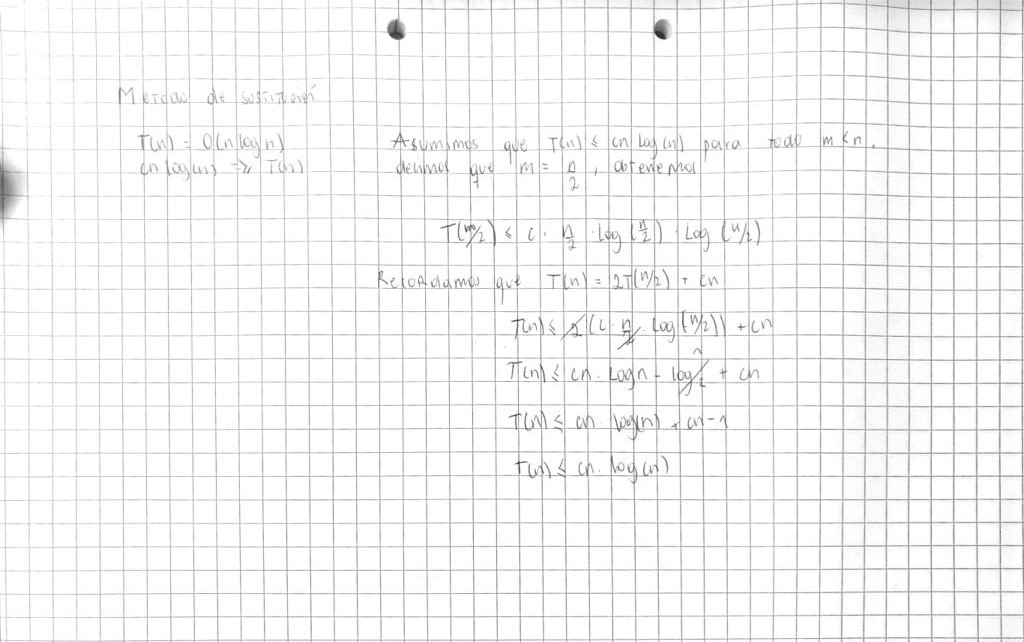


###***Mejor y peor caso***

A continuacion analizarmeos el mejor y peor caso para el problema del máximo sub-arreglo.

Primero en la parte divide y venceras como vimos en e algoritmo mergeSort, independiente de como venga el arreglo de entrada (ordenado de cualquier forma), el algoritmo dividira el arreglo inicial la misma cantidad de veces que si fuera un arreglo completamente al azar.

En la función maxCrossSubArray, el algoritmo debe consultas por todos los elementos del subarreglo ( desde la mitad al inicio o desde la mitad al final), dado que no sabemos si la suma va a seguir aumentando.

En conclusión no existe mejor y peor caso para el algortimo o en otras palabras se acercan al caso promedio.


##**Correctitud**

***Teorema 1: Correctitud Función maxSubArray***



> La función maxSubArray recibe por entrada un arreglo de n elementos y devuelve el máximo subarreglo dentro de este.



***Teorema 2: Correctitud Función MaxCrossSubArray.***



> La funcion MaxCrossSubArray recibe dos subarreglos B y C y entrega tanto el máximo subarreglo que este entre estos dos como la suma que genera.




**Prueba del teorema 1** 

Para probar el teorema 1 usaremos inducción.

**Caso base** : El arreglo tiene solo 1 elemento, el algoritmo retornará el unico elemento que se encuentra, al ser un elemento corresponde es la máxima suma que se puede generar.

**Caso promedio ( n > 1)**: Se asume que el la función maxSubArray funcionará correctamente cuando exista más de un elemento en el arreglo, m < n.

 La funcion maxSubArray separará el arreglo de entrada en dos Subarreglo C y B de tamaño (n/2), volvera a procesar cada uno de estos subarreglos y dado que asumimos que la función sera correcta para cualquier m < n, estos subarreglos se procesaran correctamente.

 Para finalizar utilizando el teorema 3, asumimos que la funcion MaxCrossSubArray funcionará correctamente y por ende nos entregará el máximo subarray que contiene el elemento medio.



 **Prueba del teorema 2**

***Propiedad invariante de bucle***

Al inicio de cada iteracion nuestras variable max_sum_izq y max_sum_der contendrán la máxima suma de cada subarreglo.

Probaremos esta propiedad en cada parte del loop.

**Inicialización:**En el comienzo de la iteracion las variables max_sum_izq y max_sum_der tienen valor -10000, dado que aun no se ha revisado ningun elemento de los subarreglos, por ende asumimos que las varibles contienen la máxima suma.

**Mantención:**Durante la iteración solo en el caso en el que el valor de las variables max_sum_izq y max_sum_der sea menor al valor de la varible sum (lleva la suma actual, no la máxima) se actualizan tales varibles, por ende en la iteracion i o j, siempre tendre guardada la mayor suma desde [ i , mitad ]
o [mitad, j], dependiendo de si es el subarreglo izquierdo o derecho.

**Finalización:** El loop se detendrá cuando termine de revisar todos los elementos del subarreglo, como habiamos mencionado anteriormente las variables max_sum_izq y max_sum_der se actualizaran igual a la variable sum solo cuando estan sean menor, por ende al finalizar todos los elementos dichas varibles contendran la máxima suma de cada subarreglo.




##**Experimentos**

En esta sección realizaremos diferentes experimentos con el algoritmo del subarray máximo, al finaliar mostraremos nuestros resultados y análisis.


###***MaxSubArray vs Kadane***
A continuación compararemos los algortimos MaxSubArray y Kadane, pero primero debemos conocer un poco el algortimo kadane.

***¿Qué es el algoritmo Kadane?***

El algoritmo Kadane es una de las formás más famosas de resolver el problema del sub-arreglo máximo. Este algoritmo funciona de forma dinámica. La idea del algoritmo es buscar todos los posibles máximos sub-arreglo contiguos del arreglo y llevar el registro de la máxima suma entre todos esos máximos sub-arreglos.

El tiempo de ejecución es O ( n ), donde n es el largo del arreglo, por esto esperariamos ver en el siguiente grafico una considerable diferencia con respecto al tiempo de ejecución comparandolo con el algoritmo del maxSubArray.

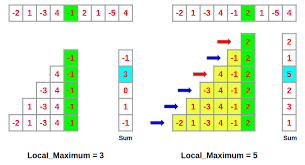



***Comparación grafica tiempo de ejecución (MaxSubArray vs Kadane)***

In [50]:
def Kadane(arr,size):
    
    max_till_now = arr[0]
    max_ending = 0
    
    for i in range(0, size):

        max_ending = max_ending + arr[i]
        if max_ending < 0:
            max_ending = 0
        
        
        elif (max_till_now < max_ending):
            max_till_now = max_ending
            
    return max_till_now


arr = [-2, -3, 4, -1, -2, 5, -3]
print("La máxima suma del arreglo es" , Kadane(arr,len(arr)))


La máxima suma del arreglo es 6


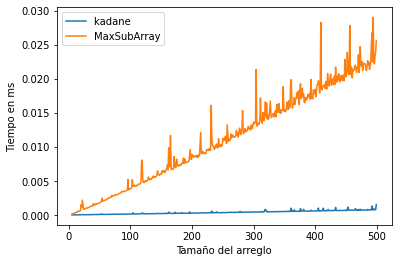

In [57]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  size = len(a)
  contador =[0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import Kadane", stmt=f"Kadane({a},{size})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{contador},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


maxSubArray(a, contador,verbose = False)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["kadane ", "MaxSubArray"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

###***Comparación gráfica mejor y peor caso max sub-arreglo***

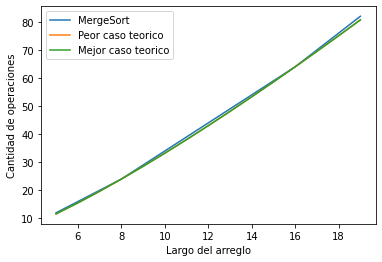

In [45]:
import matplotlib.pyplot as plt 
from math import log2
import random


x=[n for n in range(5,20)] 
y1=[n*log2(n) for n in range(5,20)] 
y2=[n*log2(n) for n in range(5,20)]
y=[]; 

for n in range(5,20):
  contador = [0,0]
  arr = random.sample(range(1, 100), n)
  maxSubArray(arr, contador, verbose = False)
  y.append(contador[1])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teorico", "Mejor caso teorico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

##**Analisis y Resultados**

***MaxSubArray v/s Kadane***

Si miramos el grafico podemos notar la evidente diferencia en el tiempo de ejecución. Por un lado el tiempo de ejecución del algoritmo Kadane es muy lineal, cuesta apreciar su crecimiento, por el otro lado, el tiempo de ejecución maxSubArray se comporta de forma cuadrática. 

Recordemos que el MaxSubArray debe revisar cada elemento de los subarreglo que va dividiendo, realizando muchas más operaciones en comparacion a kadane, que revisa los elementos del array solo una vez.

***Mejor caso v/s Peor caso***

Podemos ver en el gráfico, el mejor y peor caso se acercan mucho al caso promedio, como ya mencionamos en la sección "Tiempo de ejecución", el mejor y peor caso son identicos, dado que independiente como esten ordenados los datos del arreglo, el algoritmo realizará la misma cantidad de operaciones como si el arreglo no estuviera ordenado.
